In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 7
Question 7: Set up a numerical scheme to solve (6) and use it to solve the
equation with injection initial data (again do not hesitate to consider special
cases).

$
(\phi s)_t + (f(s)u)_x - (g(s)s_x)_x = 0
$


In [2]:
# define parameters

phi  = 1.0     
K    = 1.0
mu_w = 1.0
mu_g = 0.1
u    = 1.0    
pc0  = 0.0001
              

In [3]:
# defining mobility functions

def lambda_g(s):
    return s / mu_g

def lambda_w(s):
    return (1 - s) / mu_w

# defining f and g
def f(s):
    return lambda_g(s) / (lambda_w(s) + lambda_g(s))

def g(s):
    frac = lambda_w(s)*lambda_g(s) / (lambda_w(s) + lambda_g(s))
    return frac * K * -pc0


In [4]:

Nx = 200       # spatial grid points
Nt = 4000      # time steps
L = 1.0        # domain length
T = 2        # final time
dx = L / (Nx - 1)
dt = T / Nt

x = np.linspace(0, L, Nx)
s = np.zeros(Nx)      # gas saturation at current time
s_new = np.zeros(Nx)  # next time step


In [ ]:

def apply_BC_left():              #dirichlet BC at left boundary
    return 1.0

def apply_BC_right(s):            #neumann BC at right boundary
    return s[-1]


def compute_fluxes(s):
    sL = apply_BC_left()
    sR = apply_BC_right(s)

    sg = np.zeros(Nx + 2)
    sg[0]    = sL
    sg[1:-1] = s
    sg[-1]   = sR

    # if u >= 0.0:
    #     s_up = sg[:-1]          # take left state
    # else:
    #     s_up = sg[1:]           # take right state

    F = u * f(sg[:-1])      # upwind flux

    s_mid = 0.5 * (sg[:-1] + sg[1:])
    grad  = (sg[1:] - sg[:-1]) / dx
    D = - g(s_mid) * grad

    return F, D


# kjører explicit euler

def step_explicit(s, dt):
    F, D = compute_fluxes(s)
    div_adv = (F[1:] - F[:-1]) / dx
    div_dif = (D[1:] - D[:-1]) / dx

    s_new = s - (dt / phi) * (div_adv - div_dif)

    return s_new




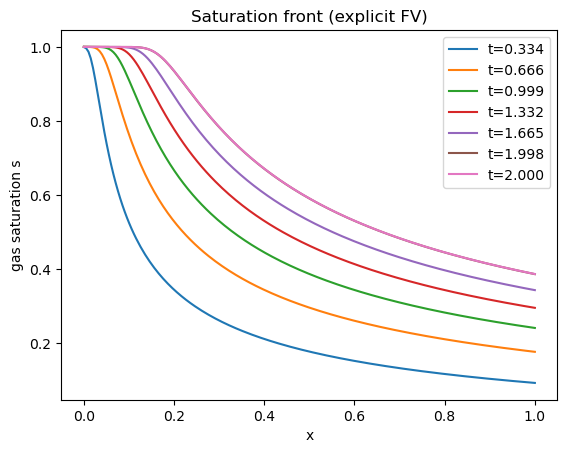

In [6]:

snap_times = []
snap_s = []
save_every = max(1, Nt // 6)

t = 0.0
for n in range(Nt):
    s = step_explicit(s, dt)
    t += dt
    if (n % save_every) == 0 or n == Nt - 1:
        if t < 0.2:
            continue
        snap_times.append(t)
        snap_s.append(s.copy())


plt.figure()
for tt, ss in zip(snap_times, snap_s):
    plt.plot(x, ss, label=f"t={tt:.3f}")
plt.xlabel("x"); plt.ylabel("gas saturation s")
plt.legend(); plt.title("Saturation front (explicit FV)")
plt.show()

#Task 8
